# Projeto 3 - Ciência dos Dados

Nome: Lara Christine Melo Vasconcelos

Nome: João Lucas Brasileiro

Nome: Yamandú Germano

Nome: Silas André Pereira

Nome: Enzo Christofoletti

___
Carregando algumas bibliotecas:

In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import classification_report, confusion_matrix

In [55]:
dados = pd.read_csv('dados_filtrados.csv',sep=';').dropna()
dados.head(5)

,vacina_descricao_dose,paciente_idade,paciente_racaCor_valor,paciente_endereco_uf,vacina_categoria_nome,paciente_enumSexoBiologico
0,1ª Dose,38.0,AMARELA,SP,Faixa Etária,M
1,3ª Dose,5.0,BRANCA,RS,Faixa Etária,M
2,1ª Dose,48.0,SEM INFORMACAO,SP,Faixa Etária,M
3,1ª Dose,77.0,SEM INFORMACAO,MG,Faixa Etária,F
4,Reforço,63.0,SEM INFORMACAO,SP,Faixa Etária,M


In [56]:
# Processamento de dados
import pandas as pd
import numpy as np
import random

# Usado no modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import seaborn as sns

# Graficos que ilustram o modelo
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [57]:
uf = pd.get_dummies(dados["paciente_endereco_uf"],drop_first=True).reset_index(drop=True)
sexobio = pd.get_dummies(dados["paciente_enumSexoBiologico"],drop_first=True).reset_index(drop=True)
cor = pd.get_dummies(dados["paciente_racaCor_valor"],drop_first=True).reset_index(drop=True)
categoria = pd.get_dummies(dados["vacina_categoria_nome"],drop_first=True).reset_index(drop=True)

FeaturesProcessadas = pd.concat([
    dados['paciente_idade'].reset_index(drop=True),
    uf,
    sexobio,
    cor,
    categoria
    ], axis=1)

FeaturesProcessadas.columns = FeaturesProcessadas.columns.astype(str)


TargetProcessado = dados["vacina_descricao_dose"].reset_index(drop=True)



print(len(FeaturesProcessadas))
print(len(TargetProcessado))


994907
994907


In [58]:
display(FeaturesProcessadas)

,paciente_idade,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,População Privada de Liberdade,Povos Indígenas,Povos e Comunidades Tradicionais,Puérperas,Trabalhadores Industriais,Trabalhadores Portuários,Trabalhadores da Educação,Trabalhadores de Limpeza Urbana,Trabalhadores de Saúde,Trabalhadores de Transporte
0,38.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,48.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,77.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,63.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994902,58.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
994903,54.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
994904,21.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
994905,66.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

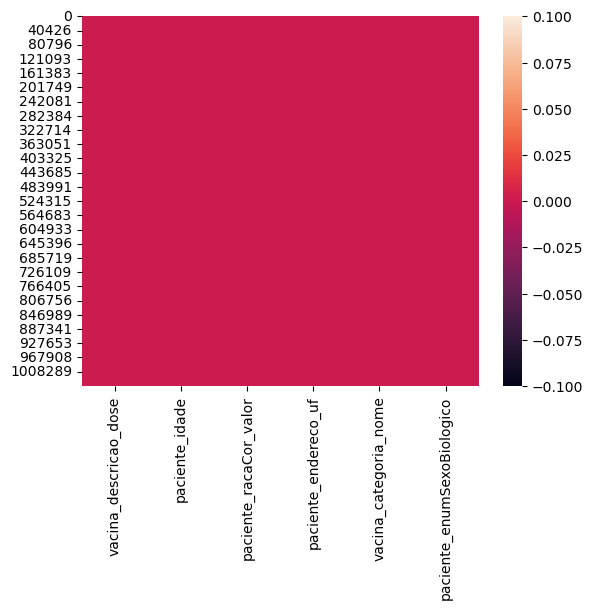

In [59]:
sns.heatmap((dados.isna()))


In [60]:
# Separando o banco de dado de treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(FeaturesProcessadas,TargetProcessado, test_size=.3)



In [61]:
display(X_teste)

,paciente_idade,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,População Privada de Liberdade,Povos Indígenas,Povos e Comunidades Tradicionais,Puérperas,Trabalhadores Industriais,Trabalhadores Portuários,Trabalhadores da Educação,Trabalhadores de Limpeza Urbana,Trabalhadores de Saúde,Trabalhadores de Transporte
990835,38.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
506602,45.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
760893,56.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
756229,13.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
816341,44.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416457,31.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159980,75.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
277056,40.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
356200,42.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
# Treinando o modelo.
rf = RandomForestClassifier()
rf.fit(X_teste, y_teste)


RandomForestClassifier()

In [63]:
y_previsao = rf.predict(X_teste)
accuracy = accuracy_score(y_teste,y_previsao)

print('Accuracy:', accuracy)

print(classification_report(y_teste,y_previsao))

Accuracy: 0.47048141707960184


c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

            1ª Dose       0.48      0.58      0.52     91584
    1ª Dose Dobrada       0.00      0.00      0.00         1
1ª Dose Revacinação       0.73      0.13      0.21       175
         1º Reforço       0.53      0.40      0.46      1355
            2ª Dose       0.48      0.47      0.47     84194
2ª Dose Revacinação       0.65      0.10      0.18       148
         2º Reforço       0.55      0.17      0.25     23768
            3ª Dose       0.54      0.25      0.35      1982
3ª Dose Revacinação       0.67      0.06      0.11        67
         3º Reforço       0.69      0.18      0.29       540
            4ª Dose       0.61      0.25      0.36       506
4ª Dose Revacinação       0.65      0.11      0.19       101
         4º Reforço       1.00      0.08      0.15        63
            5ª Dose       0.54      0.44      0.48        16
5ª Dose Revacinação       1.00      0.36      0.53        11
               Dose    

c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
display(dados['vacina_descricao_dose'])

0             1ª Dose
1             3ª Dose
2             1ª Dose
3             1ª Dose
4             Reforço
              ...    
1048570       2ª Dose
1048571    2º Reforço
1048572       2ª Dose
1048573       Reforço
1048574       2ª Dose
Name: vacina_descricao_dose, Length: 994907, dtype: object

`ITERANDO`: Vamos usar o mesmo método em ambos os modelos, pois simplificará a análise de dados e fará com que nossas estimativas sejam mias precisas. A iteração tem um é basicamente: Feature Selection

## Simplificando o banco de dados

Dado que a coluna `target` possui muitas categorias distintas (19 opções de descrição para a dose da vacina), o modelo tem dificuldade em prever o caso em que o paciente tomou a `3ª dose`.
Para melhorar a quantidade de dados disponíveis, essa coluna irá ser simplificada em rótulos.

In [65]:
display(pd.Series(dados['vacina_descricao_dose'].unique()).to_frame())

,0
0,1ª Dose
1,3ª Dose
2,Reforço
3,2ª Dose
4,Única
5,2º Reforço
6,Dose
7,Revacinação
8,Dose Adicional
9,1º Reforço


A simplificação será feita da seguinte maneira:

1ª Dose : `1ª Dose Revacinação`, `1ª Dose Dobrada`, `1º Reforço`, `Única`, `Reforço`, `Dose` e `Revacinação`\
2ª Dose: `2º Reforço`, `2ª Dose Revacinação`, `Dose Adicional`\
3ª Dose: `3º Reforço` e `3ª Dose Revacinação`\
4ª Dose: `4º Reforço` e `4ª Dose Revacinação`\
5ª Dose: `5ª Dose Revacinação`



In [66]:
TargetProcessado2 = dados["vacina_descricao_dose"].astype('string')

TargetProcessado2.loc[TargetProcessado2.isin(["1ª Dose Revacinação","1ª Dose Dobrada","1º Reforço","Única","Reforço","Dose","Revacinação"])] = "1ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["2º Reforço","2ª Dose Revacinação","Dose Adicional"])] = "2ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["3º Reforço","3ª Dose Revacinação"])] = "3ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["4º Reforço","4ª Dose Revacinação"])] = "4ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["5ª Dose Revacinação"])] = "5ª Dose"

TargetProcessado2 = TargetProcessado2.astype('category')

In [67]:
(TargetProcessado2.value_counts(normalize=True)*100).round(2)

vacina_descricao_dose
1ª Dose    61.81
2ª Dose    37.10
3ª Dose     0.87
4ª Dose     0.22
5ª Dose     0.01
Name: proportion, dtype: float64

**Separando a nova coluna `Target` entre `train` e `test`**

In [68]:
y_treino,y_teste = train_test_split(TargetProcessado2, test_size=.3 , train_size=.7)

**Aplicando o novo `Target` ao modelo**

In [69]:
# Treinando o modelo.
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_teste, y_teste)

RandomForestClassifier(class_weight='balanced')

**Resultados do modelo**

In [70]:
testsResult = rf.predict(X_teste)
print(classification_report(y_teste,testsResult))



              precision    recall  f1-score   support

     1ª Dose       0.76      0.53      0.62    184407
     2ª Dose       0.54      0.51      0.52    110760
     3ª Dose       0.05      0.86      0.10      2634
     4ª Dose       0.03      0.99      0.06       638
     5ª Dose       0.03      1.00      0.06        34

    accuracy                           0.53    298473
   macro avg       0.28      0.78      0.27    298473
weighted avg       0.67      0.53      0.58    298473



<Axes: >

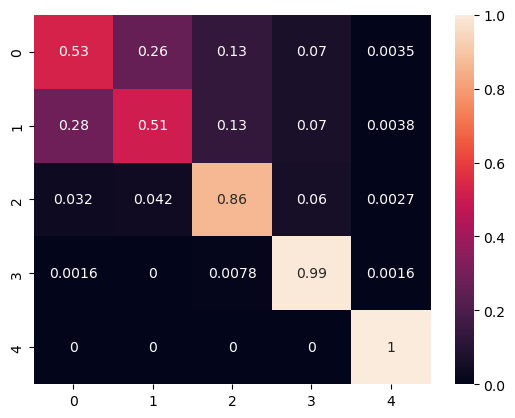

In [71]:
sns.heatmap(confusion_matrix(y_teste,testsResult,normalize='true'),annot=True)

## Simplificando ainda mais a coluna `Target`

Agora, a coluna foi definida entre os valores `True` e `False` para se o paciente tomou a partir da 2ª dose da vacina.

In [72]:
TargetProcessado3 = TargetProcessado2.isin(["2ª Dose","3ª Dose","4ª Dose","5ª Dose"])
print(TargetProcessado3.value_counts(normalize=True))

vacina_descricao_dose
False    0.618053
True     0.381947
Name: proportion, dtype: float64


In [73]:
y_treino,y_teste = train_test_split(TargetProcessado3, test_size=.3 , train_size=.7)

In [74]:
# Treinando o modelo.
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_teste, y_teste)

RandomForestClassifier(class_weight='balanced')

In [75]:
testsResult = rf.predict(X_teste)
print(classification_report(y_teste,testsResult))

              precision    recall  f1-score   support

       False       0.74      0.65      0.69    184514
        True       0.52      0.63      0.57    113959

    accuracy                           0.64    298473
   macro avg       0.63      0.64      0.63    298473
weighted avg       0.66      0.64      0.64    298473



<Axes: >

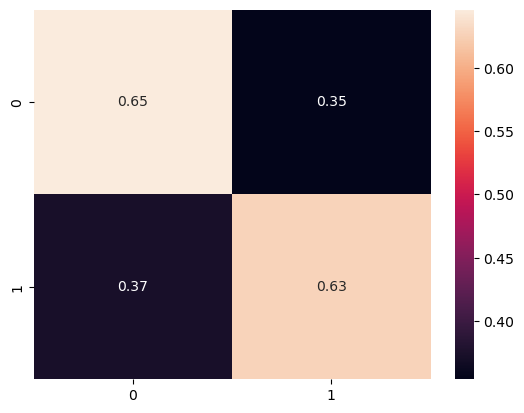

In [76]:
sns.heatmap(confusion_matrix(y_teste,testsResult,normalize='true'),annot=True)